# HW3 Deep Learning CS-5787

## Problem 1 - BatchNorm (5 points)
Discuss the pros and cons of using BatchNorm. When does BatchNorm fail? Discuss
alternatives and their pros and cons. What properties would an ideal normalization method
have?

<font color='blue'> 
Answer:


## Problem 2 - Using a Pre-Trained CNN (10 points total)
For this problem you must use PyTorch. For this problem you will use a CNN that has
been trained on ImageNet-1k. You may use any pre-trained architecture developed from
2014 onwards (e.g., not AlexNet, but a VGG or ResNet model would be fine). The CNN
needs to produce d-dimensional embeddings that are fed into the 1000-way output layer,
where d is typically 512, 2048, or 4096. You will be re-using the CNN you select in the
next problem for transfer learning with embeddings.

In [1]:
import numpy as np
def format_plot(ax, xlab = "", ylab = "", title = "", legend = False, 
                xticks = None, yticks = None, no_scientific = True):
    
    ax.set_xlabel(xlab,  fontsize = 14)
    ax.set_ylabel(ylab,  fontsize = 14)
    ax.set_title(title,  fontsize = 16, fontweight = "bold")
    
    if no_scientific:
        ax.ticklabel_format(useOffset = False, style='plain')
    if legend:
        ax.legend(fontsize = 14)
    if xticks is not None:
        ax.set_xticks(xticks)
    if yticks is not None:
        ax.set_yticks(yticks)

In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image

model = models.resnet50(pretrained = True)
model.eval()

print("ResNet-50 Model Loaded Successfully")

In [ ]:
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

### Part 1 - Using Pre-Trained Deep CNN (5 points)
Run it on peppers.jpg. Output the top-3 predicted categories and the probabilities. State
the pre-trained CNN model that you used.
Make sure to pre-process the input image appropriately. Look at the toolbox documenta-
tion for the pre-trained model you use to determine how to do this.
Solution:

<font color='blue'> 
Answer:

(src for pre-processing steps: https://pytorch.org/hub/pytorch_vision_resnet/)


In [ ]:
img = Image.open("peppers.jpg")
resize, crop, mu, std = (256, 224, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

transform = transforms.Compose([
    transforms.Resize(resize),
    transforms.CenterCrop(crop),
    transforms.ToTensor(),
    transforms.Normalize(
        mean= mu,
        std = std
    )
])

img = transform(img).unsqueeze(0)

with torch.no_grad():
    embedding = model(img)

linear_layer = torch.nn.Linear(embedding.shape[1], 1000)
logits = linear_layer(embedding.squeeze())

probs = torch.softmax(logits, dim = 0)

In [94]:
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

top3_probabilities, top3_category_id = torch.topk(probs, 3)

for i in range(top3_probabilities.size(0)):
    print(str(i), categories[top3_category_id[i]] +":", top3_probabilities[i].item())

0 missile: 0.11392127722501755
1 Kerry blue terrier: 0.07220014184713364
2 agama: 0.05101615935564041


### Part 2 - Visualizing Feature Maps (5 points)
Write code to visualize the feature maps in the network as images. You will likely need to
normalize the values between 0 and 1 to do this.
Choose five interesting feature maps from early in the network, five from the the middle of
the network, and five close to the end of the network. Display them to us and discuss
the structure of the feature maps. Try to find some that are interpretable, and discuss the
challenges in doing so.

<font color='blue'> 
Answer:
TODO: Try to find some that are interpretable, and discuss the challenges in doing so.

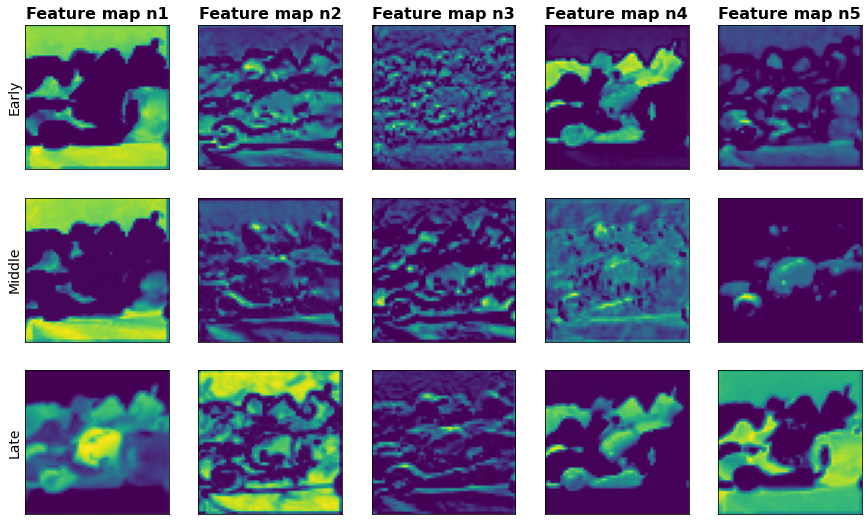

In [165]:
features = model.layer1(
             model.maxpool(
               model.relu(
                 model.bn1(
                   model.conv1(img)
                 )
               )
             )
           )

# Normalize feature maps between 0 and 1
features = (features - features.min()) / features.max()


# Plot first 5 feature maps
rows, cols = 3, 5
fig, ax = plt.subplots(rows, cols, figsize = (15, 9))
interesting_feats = np.array(
                      [[0, 3, 6, 8, 10], 
                      [112, 116, 120,  135, 144], 
                      [220, 235, 243, 251, 253]],
                      dtype = np.int32
                    )
for i in range(rows):
    for j in range(cols): 
        ylab = "Early" if i == 0 else ("Middle" if i == 1 else "Late")
        feat_i = interesting_feats[i, j]
        ax[i, j].imshow(features[0, feat_i].detach().numpy())
        format_plot(ax[i, j], ylab = ylab if j == 0 else "", 
                    xticks = [], yticks = [], title = "Feature map n" + str(j + 1) if i == 0 else "")
plt.show()

<font color='blue'> 
Answer:


### Problem 3 - Transfer Learning with a Pre-Trained CNN (20 points)
For this problem you may use a toolbox (and you must use PyTorch). We will do image
classification using the Oxford Pet Dataset. The dataset consists of 37 categories with
about 200 images in each of them. You can find the dataset here: http://www.robots.ox.ac.uk/~vgg/data/pets/
Rather than using the final ‘softmax’ layer of the CNN as output to make predictions
as we did in problem 2, instead we will use the CNN as a feature extractor to classify
the Pets dataset. For each image, grab features from the last hidden layer of the neural
network, which will be the layer before the 1000-dimensional output layer (around 500–
6000 dimensions). You will need to resize the images to a size compatible with your
network (usually 224 × 224 × 3, but look at the documentation for the pre-trained system
you selected). You should grab the output just after the last hidden layer or after global
pooling (if it is 1000-dimensional, you will know you did it wrong).
After you extract these features for all of the images in the dataset, normalize them to
unit length by dividing by the L2 norm. Train a linear classifier of your choice1 with the
training CNN features, and then classify the test CNN features. Report mean-per-class
accuracy and discuss the classifier you used.

<font color='blue'> 
Answer:


### Problem 4 - Training a Small CNN (55 points total)
#### Part 1 (25 points)
For this problem you must use a toolbox. Train a CNN with three hidden convolutional
layers that use the Mish activation function. Use 32 7 × 7 filters for the first layer, followed
by 2 × 2 max pooling (stride of 2). The next two convolutional layers will use 64 3 × 3
filters followed by the Mish activation function. Prior to the softmax layer, you should have
an average pooling layer that pools across the preceding feature map. Do not use a pre-
trained CNN. AdamW is the recommended optimizer, but you may try Ranger, RAdam,
or something else more recent if you would like, but you will probably have to add in an
external toolbox to do this. Tune your hyperparameters on a small version of the dataset
to make sure your training loss goes down and things are set up correctly.
Train your model using all of the CIFAR-10 training data, and evaluate your trained system
on the CIFAR-10 test data.

Visualize all of the 7 × 7 × 3 filters learned by the first convolutional layer as an RGB image
array (I suggest making a large RGB image that is made up of each of the smaller images).
This visualization of the filters should be similar to the ones we saw in class. Note that
you will need to normalize each filter to display them. Let Ht be the t’th filter learned by
the network. The normalized version $H^{'}_t$  for visualization is then given by
$$
H^{'}_t = \frac{H_t}{2(∥H_t∥_∞ + ε)} + \frac{1}{2},
$$

where $ε > 0$ (e.g., $ε = 0.0001$). This will make all values in the filter be values from 0 to 1
so that they can be displayed as an RGB image.

Display the training loss as a function of epochs. What is the accuracy on the test data?
How did you initialize the weights? What optimizer did you use? Discuss your architecture
and hyper-parameters.



<font color='blue'> 
    
Answer:
    
- IMAGE SHOWING THE FILTERS
- TRAINING LOSS AS FUNCTION OF EPOCHS
- TEST DATA ACCURACY
- WEIGHT INITIALIZATION INFORMATION
- DESCRIBE HYPER-PARAMETERS


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def format_plot(ax, xlab = "", ylab = "", title = "", legend = False, 
                xticks = None, yticks = None, no_scientific = True):
    
    ax.set_xlabel(xlab,  fontsize = 14)
    ax.set_ylabel(ylab,  fontsize = 14)
    ax.set_title(title,  fontsize = 16, fontweight = "bold")
    
    if no_scientific:
        ax.ticklabel_format(useOffset = False, style='plain')
    if legend:
        ax.legend(fontsize = 14)
    if xticks is not None:
        ax.set_xticks(xticks)
    if yticks is not None:
        ax.set_yticks(yticks)

In [ ]:
# Define CNN
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

class Mish(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return x * torch.tanh(nn.functional.softplus(x))

class SmallCNN(nn.Module):
    def __init__(self, use_batch_norm = False):
        super(SmallCNN, self).__init__()
        self.use_batch_norm = use_batch_norm

        self.conv1 = nn.Conv2d(3, 32, 7)
        self.bn1 = nn.BatchNorm2d(32)
        self.maxpool = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 64, 3)
        self.bn3 = nn.BatchNorm2d(64)
        self.avgpool = nn.AdaptiveAvgPool2d(output_size = (1, 1))
        self.fc = nn.Linear(64, 10)
        self.mish = Mish()
        self.softmax = nn.Softmax(dim = 1)

    
    def forward(self, x):
        x = self.conv1(x)
        if self.use_batch_norm:
            x = self.bn1(x)
        x = self.mish(x)
        x = self.maxpool(x)
        
        x = self.conv2(x)
        if self.use_batch_norm:
            x = self.bn2(x)
        x = self.mish(x)

        x = self.conv3(x)
        if self.use_batch_norm:
            x = self.bn3(x)
        x = self.mish(x)
        x = self.avgpool(x)
        
        x = x.view(x.size(0), -1)
        x = self.softmax(x)
        return x

In [ ]:
# Load Data
transform_norm = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

def load_data(dataset = "CIFAR10", root = "./data", train = True, 
              download = True, transform = transform_norm,
              batch_size = 128, num_workers = 2):  
    
    if dataset == "CIFAR10":
        data = datasets.CIFAR10(root = root, train = train, download = download, 
                            transform = transform)
        loader = DataLoader(data, batch_size = batch_size, 
                        shuffle = train, num_workers = num_workers)
    return data, loader

train_data, train_loader = load_data(train = True)
test_data, test_loader = load_data(train = False)

In [ ]:
import matplotlib.pyplot as plt
em_s, em_e = "\033[1m", "\033[0;0m"

# Train and Test CNN
def train_and_test_CNN(net, train_loader, test_loader, 
                       lr = 0.001, wd = 0.1, 
                       loss_func = nn.CrossEntropyLoss(), epochs = 15):
  
    optimizer = optim.AdamW(net.parameters(), lr = lr, weight_decay = wd)

    correct_train_preds = 0
    train_count = 0
    train_loss_arr = []
    test_loss_arr = []
    
    for epoch in range(epochs):
        
        loss_acc = 0
        for data in train_loader:
            inputs, labels = data
            optimizer.zero_grad()

            outs = net(inputs)
            _, pred = torch.max(outs.data, 1)
            train_loss = loss_func(outs, labels)

            train_loss.backward()
            optimizer.step()
            loss_acc += train_loss.item()

            train_count += labels.size(0)
            correct_train_preds += (pred == labels).sum().item()

    train_loss_arr.append(loss_acc / len(train_loader))

    correct_test_preds = 0
    loss_acc = 0
    test_count = 0
    
    with torch.no_grad():
        for data in test_loader:
            imgs, labels = data
            outs = net(imgs)
            _, pred = torch.max(outs.data, 1)

            test_loss = loss_func(outs, labels)
            loss_acc += test_loss.item()

            test_count += labels.size(0)
            correct_test_preds += (pred == labels).sum().item()

    test_loss_arr.append(loss_acc / len(train_loader))

    print((f"{em_s} Epoch: {em_e} {epoch + 1}," 
    f"\t {em_s} Train Loss: {em_e} {round(train_loss_arr[-1], 4)},"
    f"\t {em_s} Test Loss: {em_e} {round(test_loss_arr[-1], 4)},"  
    f"\t {em_s} Train Accuracy: {em_e}: {round(100 * correct_train_preds / train_count, 4)} %,"
    f"\t {em_s} Test Accuracy: {em_e}: {round(100 * correct_test_preds / test_count, 4)} %"
    ))

    fig, ax = plt.subplots(1, 1, figsize = (6, 9))
    ax.plot(train_loss_arr, label='Train')
    ax.plot(test_loss_arr, label='Test')

    format_plot(ax, xlab = "Epochs", ylab = "Cross Entropy Loss", 
    title = "Small CNN Performance", legend = True)
    plt.show()

In [ ]:
# Run Training and Testing
small_cnn = SmallCNN()
train_and_test_CNN(small_cnn, train_loader, test_loader)

In [ ]:
def normalize_filters(filters, eps = 0.0001):
    return [(filter / (2 * (filters.abs().max() + eps))) + 0.5 for filter in filters]

def print_first_conv2d_filters(net, rows = 4, cols = 8):
    name, mod = None, None
    for n, m in net.named_modules():
        if isinstance(m, torch.nn.Conv2d):
            name = n
            mod = m
            break 

if mod is not None:
    norm_filters = normalize_filters(mod.weight.data)
    fig, ax = plt.subplots(rows, cols, figsize = (10, 5))
    for i in range(rows):
        for j in range(cols):
            ax[i, j].imshow(norm_filters[i * 8 + j].permute(1, 2, 0).numpy())

            format_plot(ax[i, j], xticks = [], yticks = [])
    
    plt.suptitle(f'{name} filters')
    plt.show()

In [ ]:
print_first_conv2d_filters(small_cnn)

### Part 2 (20 points)
Using the same architecture as in part 1, add in batch normalization between each of
the hidden layers. Compare the training loss with and without batch normalization as a
function of epochs. What is the final test accuracy? Visualize the filters.

<font color='blue'> 
Answer:


In [ ]:
# Run Training and Testing
small_cnn_bn = SmallCNN(use_batch_norm = True)
train_and_test_CNN(small_cnn_bn, train_loader, test_loader)

In [ ]:
print_first_conv2d_filters(small_cnn_bn)

### Part 3 (10 points)
Can you do better with a deeper and better network architecture? Optimize your CNN’s
architecture to improve performance. You may get significantly better results by using
smaller filters for the first convolutional layer. Describe your model’s architecture and
your design choices. What is your final accuracy?
Note: Your model should perform better than the one in Part 1 and Part 2.

<font color='blue'> 
Answer:


In [ ]:
# Define Bigger CNN Model

class MediumCNN(nn.Module):
    def __init__(self, use_batch_norm = True, dropout_rate = 0.2):
        super(MediumCNN, self).__init__()
        self.use_batch_norm = use_batch_norm

        self.conv1 = nn.Conv2d(3, 32, 7)
        self.bn1 = nn.BatchNorm2d(32)
        self.maxpool = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.bn2 = nn.BatchNorm2d(64)
        
        self.conv3 = nn.Conv2d(64, 64, 3)
        self.bn3 = nn.BatchNorm2d(64)
        
        self.conv4 = nn.Conv2d(64, 128, 3)
        self.bn4 = nn.BatchNorm2d(128)
        
        self.conv5 = nn.Conv2d(128, 128, 3)
        self.bn5 = nn.BatchNorm2d(128)
        
        self.conv5 = nn.Conv2d(128, 256, 3)
        self.bn5 = nn.BatchNorm2d(256)
        
        self.conv6 = nn.Conv2d(256, 256, 3)
        self.bn6 = nn.BatchNorm2d(256)
        
        self.avgpool = nn.AdaptiveAvgPool2d(output_size = (1, 1))
        self.fc = nn.Linear(256, 10)
        self.mish = Mish()

        self.dropout = nn.Dropout(dropout_rate)
        self.softmax = nn.Softmax(dim = 1)

    
    def forward(self, x):
        x = self.conv1(x)
        if self.use_batch_norm:
            x = self.bn1(x)
        x = self.mish(x)
        x = self.maxpool(x)
        
        x = self.conv2(x)
        if self.use_batch_norm:
            x = self.bn2(x)
        x = self.mish(x)

        x = self.conv3(x)
        if self.use_batch_norm:
            x = self.bn3(x)
        x = self.mish(x)
        
        x = self.conv4(x)
        if self.use_batch_norm:
            x = self.bn4(x)
        x = self.mish(x)

        x = self.conv5(x)
        if self.use_batch_norm:
            x = self.bn5(x)
        x = self.mish(x)

        x = self.conv6(x)
        if self.use_batch_norm:
            x = self.bn6(x)
        x = self.mish(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc(x)
        return x


In [ ]:
medium_cnn = MediumCNN()
train_and_test_CNN(medium_cnn, train_loader, test_loader)

### Problem 5 - Vision Transformers (20 points)
In this problem, you will redo problem 3, but instead of transfer learning with a CNN, you
will do transfer learning with a Vision Transformer. Identify a strong vision transformer
architecture for transfer learning that was pre-trained on ImageNet-1K (note that some
pre-trained models are pre-trained on larger datasets). We suggest using Swin Transformers
or later incarnations of them. You will have to download the pre-trained model and the
appropriate code.
Briefly discuss the Vision Transformer you selected. Compare performance of the Vision
Transformer to the CNN you used earlier in terms of overall performance. Are there
some images that the CNN gets correct but the Swin Transformer misclassifies, and vice
versa?


<font color='blue'> 
Answer:

## Code Appendix
## BONUS PROBLEMS
## Problem 6 - BatchNorm - Investigations (10 bonus points)

In this bonus problem, you will study BatchNorm’s properties for a single ‘dot prod-
uct’ neuron, but the results are the same if you have multiple neurons in a layer or use
convolutional units.
Let

$$
x_i = w^Th_i + b
$$

be the output of the neuron, where $h_i ∈ R^d$ is a vector of inputs to the neuron, $w ∈ R^d$ are
the weights of the neuron, and b is the bias. BatchNorm is applied in the subsequent ‘layer’
before the non-linearity. After computing the activation of the neuron, the BatchNorm
transformation of the output activations is given by

$$
\hat{x}_i = \frac{x_i − μ_B}{\sqrt{σ^2_B + ε}}
$$

where the mean of the activation in the mini-batch is given by

$$
μ_B = \frac{1}{m}\sum_{i=1}^m x_i,
$$

the variance is given by

$$ 
σ^2_B = \frac{1}{m}\sum_{i=1}^m (x_i - μ_B)^2, 
$$

and where $m$ is the mini-batch size.

Substitute in the neuron’s activation function into the BatchNorm equations and simplify.
What does this tell you about how BatchNorm impacts the weights and the bias of the neu-
ron? How should you adjust your neural network’s architecture if using BatchNorm?

<font color='blue'> 
Answer:

### Problem 7 - Fooling Convolutional Neural Networks (30 bonus points)

In this problem you will fool the pre-trained convolutional neural network of your choice.
One of the simplest ways to do this is to add a small amount of adversarial noise to the input
image, which causes the correct predicted label ytrue to switch to an incorrect adversarial
label yf ool, despite the image looking the same to our human visual system.

### Part 1 (20 bonus points)
More formally, given an input image $X$, an ImageNet pre-trained network will give us
$P(y|X)$, which is a probability distribution over labels and the predicted label can be com-
puted using the argmax function. We assume the network has been trained to correctly
classify $X$. To create an adversarial input, we want to find $\hat{X}$ such that $\hat{X}$ will be mis-
classified as $y_{fool}$. To ensure that $\hat{X}$ does not look radically different from $X$ we impose a
constraint on the distance between the original and modified images, i.e., $∥X − \hat{X}∥_∞ ⩽ ε$,
where $ε$ is a small positive number. This model can be trained using backpropagation to
find the adversarial example, i.e.,

$$
\hat{X} = argmin ._{X^{'}} \left( Loss(X^{'}, y_{fool}) + \frac{λ}{2}∥X^{'} − X∥_∞ \right),
$$

where $λ > 0$ is a hyperparameter and $∥·∥_∞$ denotes the infinity norm for tensors.

To do this optimization, you can begin by initializing $X^{'} ← X$. Then, repeat the following
two steps until you are satisfied with the results (or convergence):

$$
X^{'} ← X^{'} + λ \frac{∂}{∂X^{'}} P(y_{fool} | X^{'})
$$
$$
X^{'} ← clip(X^{'}, X − ε, X + ε)
$$

where the clip function ‘clips’ the values so that each pixel is within ε of the original image.

You may use the neural network toolbox of your choice to do this optimization, but we
will only provide help for PyTorch. You can read more about this approach here: https:
//arxiv.org/pdf/1707.07397.pdf. Note that the details are slightly different.

Demonstrate your method on four images. The first image should be ‘peppers,’ which
was used in an earlier problem. Show that you can make the network classify it as a
space shuttle (ImageNet class id 812). You can choose the other three photos, but ensure
that they contain an ImageNet object and make the network classify it as a different
class. Ensure that the pre-trained CNN that you use outputs the correct class as the
most likely assignment and give its probability. Then, show the ‘noise image’ that will
be added to the original image. Then, show the noise+original image along with the
new most likely class and the new largest probability. The noise+original image should be
perceptually indistinguishable from the original image (to your human visual system). You
may use the ImageNet pre-trained CNN of your choice (e.g., VGG-16, ResNet-50, etc.),
but mention the pre-trained model that you used. You can show your results as a 4 × 3
array of figures, with each row containing original image (titled with most likely class and
probability), the adversarial noise, and then the new image (titled with most likely class
and probability).



<font color='blue'> 
Answer:

### Part 2 (10 bonus points)
The method we deployed to make adversarial examples is not robust to all kinds of trans-
formations. To examine the robustness of this, take the four adversarial images you created
in part 1 and show how the following image manipulations affect the predicted class prob-
abilities: mirror reflections (flip the image), a crop that contains about 80% of the original
object, a 30 degree rotation, and converting the image to grayscale and then replicating
the three gray channels to make a faux RGB image. Show the modified adversarial images
and title them with the new most likely class and probabilities. Discuss the results and
why you think it did or did not work in each case.


<font color='blue'> 
Answer: